Data Exlporation

In [310]:
# import packages

import pandas as pd
import numpy as np

import scipy.stats as sc_stat

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image


import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

from nltk.tokenize import TweetTokenizer   

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [311]:
# initial settings
lemmitizer = WordNetLemmatizer()
tokenizer = TweetTokenizer()
stopword=set(STOPWORDS)

%matplotlib inline

In [312]:
#importing the dataset
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

print('Train:', train) 
print('Test:', test)

Train:                       id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  obscene  threat

In [313]:
# test v/s train data insights

train_rows = train.shape[0]
test_rows = test.shape[0]
tot_rows=train_rows+test_rows
print('       : train : test')
print('shape  :', train.shape, ':', test.shape)
print('rows   :',train_rows,':',test_rows)
print('perc   :',round(train_rows*100/tot_rows),'   :',round(test_rows*100/tot_rows))

       : train : test
shape  : (159571, 8) : (153164, 2)
rows   : 159571 : 153164
perc   : 51    : 49


### Class Imbalance:

In [314]:
# for train dataset
features = pd.Series.sort_values(train.iloc[:,2:].sum())

# can it be a dictionary?
tot_rows_train = train.iloc[:,2:].sum(axis=1)

#count number of clean entries
train['clean'] = (tot_rows_train==0)

print('Count for each feature: ')
for feature in train.iloc[:,2:]:
    print(feature, ': ', train[feature].sum())

clean_comms = train['clean'].sum()
print('Total comments = ',len(train))
print('Total clean comments = ', clean_comms)
print('Total tags =',features.sum())


Count for each feature: 
toxic :  15294
severe_toxic :  1595
obscene :  8449
threat :  478
insult :  7877
identity_hate :  1405
clean :  143346
Total comments =  159571
Total clean comments =  143346
Total tags = 35098


In [315]:
# # for test dataset
# features_test = pd.Series.sort_values(test.iloc[:,2:].sum())

# # can it be a dictionary?
# tot_rows_test = test.iloc[:,2:].sum(axis=1)

# #count number of clean entries
# test['clean'] = (tot_rows_test==0)

# print('Count for each feature: ')
# for feature in test.iloc[:,2:]:
#     print(feature, ': ', test[feature].sum())

# clean_comms_test = test['clean'].sum()
# print('Total comments = ',len(test))
# print('Total clean comments = ', clean_comms_test)
# print('Total tags =',features_test.sum())

### Check for Null values:

In [316]:
print('Check for null values in Train dataset')
train_null = train.isnull().sum()
for feature in train:    
    if train_null[feature] != 0:
        train['comment_text'].fillna('unknown', inplace=True)
    else:
        print(feature, train_null[feature])

Check for null values in Train dataset
id 0
comment_text 0
toxic 0
severe_toxic 0
obscene 0
threat 0
insult 0
identity_hate 0
clean 0


In [317]:
# print('Check for null values in Test dataset')
# test_null = test.isnull().sum()
# for feature in test:    
#     if test_null[feature] != 0:
#         train['comment_text'].fillna('unknown', inplace=True)
#     else:
#         print(feature, test_null[feature])

### Visualize train data:

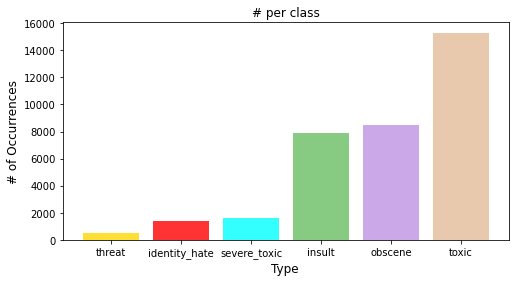

In [318]:
# plot for train dataset
plt.figure(figsize=(8,4))
ax= plt.bar(features.index, features.values, alpha=0.8, color=['gold', 'red', 'aqua', '#69bf64', '#bf94e4', '#e3bc9a',  '#8d4e85'])
plt.title('# per class')
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
plt.show()

In [319]:
# # plot for test dataset
# plt.figure(figsize=(8,4))
# ax= plt.bar(features_test.index, features_test.values, alpha=0.8, color=['gold', 'red', 'aqua', '#69bf64', '#bf94e4', '#e3bc9a',  '#8d4e85'])
# plt.title('# per class')
# plt.ylabel('# of Occurrences', fontsize=12)
# plt.xlabel('Type ', fontsize=12)
# plt.show()

### Visualizing mutiple tags:

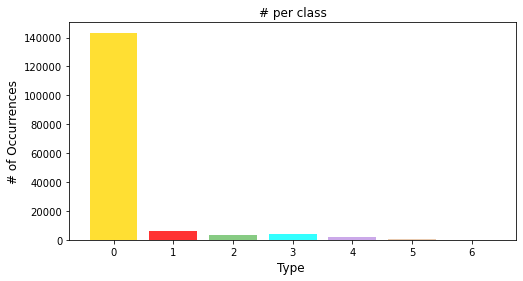

In [320]:
# plot for train dataset
plt.figure(figsize=(8,4))
ax= plt.bar(tot_rows_train.value_counts().index, tot_rows_train.value_counts().values, alpha=0.8, color=['gold', 'red', 'aqua', '#69bf64', '#bf94e4', '#e3bc9a',  '#8d4e85'])
plt.title('# per class')
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
plt.show()

In [321]:
# # plot for test dataset
# plt.figure(figsize=(8,4))
# ax= plt.bar(tot_rows_test.value_counts().index, tot_rows_test.value_counts().values, alpha=0.8, color=['gold', 'red', 'aqua', '#69bf64', '#bf94e4', '#e3bc9a',  '#8d4e85'])
# plt.title('# per class')
# plt.ylabel('# of Occurrences', fontsize=12)
# plt.xlabel('Type ', fontsize=12)
# plt.show()

### HeatMap for tags correlation:

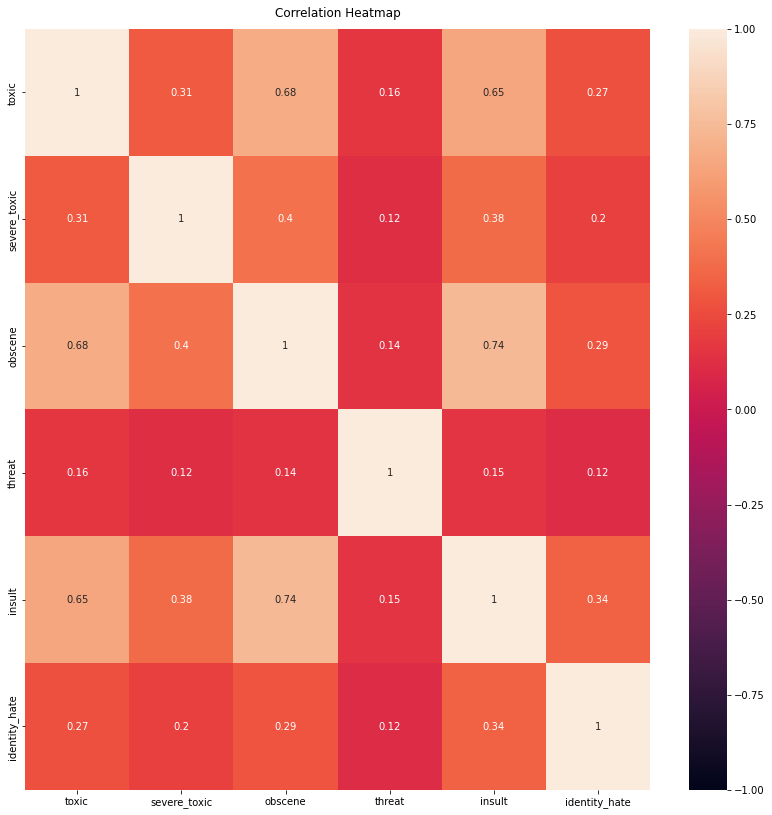

In [322]:
# # plot for train dataset
plt.figure(figsize=(14,14))
heatmap = sns.heatmap(train.iloc[:,2:8].corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

C:\Users\shrut\anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\shrut\anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


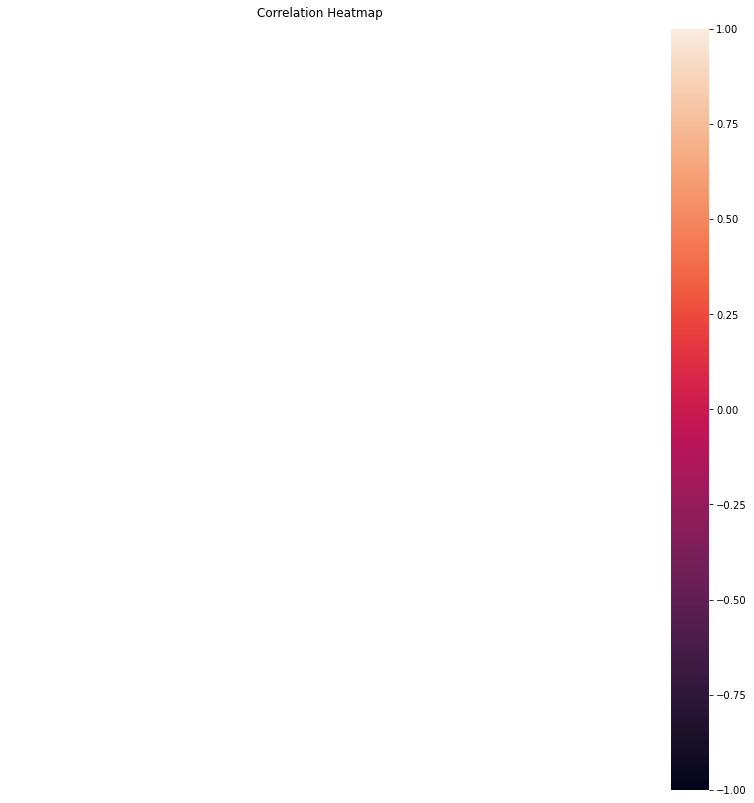

In [323]:
# # plot for test dataset
# plt.figure(figsize=(14,14))
# heatmap = sns.heatmap(test.iloc[:,2:8].corr(), vmin=-1, vmax=1, annot=True)

# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [324]:
# filter temp by removing clean comments from train dataset
temp_df=train.iloc[:,2:-1]

# potential overlap between tags based on correlation matrix
confusion_matrix = pd.crosstab(temp_df['toxic'], temp_df['severe_toxic'])
print('Confusion matrix between toxic and severe toxic:')
print(confusion_matrix)

confusion_matrix = pd.crosstab(temp_df['toxic'], temp_df['obscene'])
print('Confusion matrix between toxic and obscene:')
print(confusion_matrix)

confusion_matrix = pd.crosstab(temp_df['toxic'], temp_df['threat'])
print('Confusion matrix between toxic and threat:')
print(confusion_matrix)

confusion_matrix = pd.crosstab(temp_df['toxic'], temp_df['insult'])
print('Confusion matrix between toxic and insult:')
print(confusion_matrix)

confusion_matrix = pd.crosstab(temp_df['toxic'], temp_df['identity_hate'])
print('Confusion matrix between toxic and identity hate:')
print(confusion_matrix)

Confusion matrix between toxic and severe toxic:
severe_toxic       0     1
toxic                     
0             144277     0
1              13699  1595
Confusion matrix between toxic and obscene:
obscene       0     1
toxic                
0        143754   523
1          7368  7926
Confusion matrix between toxic and threat:
threat       0    1
toxic              
0       144248   29
1        14845  449
Confusion matrix between toxic and insult:
insult       0     1
toxic               
0       143744   533
1         7950  7344
Confusion matrix between toxic and identity hate:
identity_hate       0     1
toxic                      
0              144174   103
1               13992  1302


In [325]:
# # filter temp by removing clean comments from train dataset
# temp_df_test=test.iloc[:,2:-1]

# # potential overlap between tags based on correlation matrix
# confusion_matrix = pd.crosstab(temp_df['toxic'], temp_df['severe_toxic'])
# print('Confusion matrix between toxic and severe toxic:')
# print(confusion_matrix)

# confusion_matrix = pd.crosstab(temp_df['toxic'], temp_df['obscene'])
# print('Confusion matrix between toxic and obscene:')
# print(confusion_matrix)

# confusion_matrix = pd.crosstab(temp_df['toxic'], temp_df['threat'])
# print('Confusion matrix between toxic and threat:')
# print(confusion_matrix)

# confusion_matrix = pd.crosstab(temp_df['toxic'], temp_df['insult'])
# print('Confusion matrix between toxic and insult:')
# print(confusion_matrix)

# confusion_matrix = pd.crosstab(temp_df['toxic'], temp_df['identity_hate'])
# print('Confusion matrix between toxic and identity hate:')
# print(confusion_matrix)


### Sample comments:

In [332]:
# for train dataset
print('toxic:')
print(train[train.toxic==1].iloc[3,1])
print('--------------------------------------------------------------------------------------------------------------------')

print('severe_toxic:')
print(train[train.severe_toxic==1].iloc[2,1])
print('--------------------------------------------------------------------------------------------------------------------')

print('Threat:')
print(train[train.threat==1].iloc[4,1])
print('--------------------------------------------------------------------------------------------------------------------')

print('Obscene:')
print(train[train.obscene==1].iloc[3,1])
print('--------------------------------------------------------------------------------------------------------------------')

print('identity_hate:')
print(train[train.identity_hate==1].iloc[4,1])
print('--------------------------------------------------------------------------------------------------------------------')

toxic:
You are gay or antisemmitian? 

Archangel WHite Tiger

Meow! Greetingshhh!

Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...

1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!

2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!

3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!

Beware of the Dark Side!
--------------------------------------------------------------------------------------------------------------------
severe_toxic:
you are a stupid fuck 

and your mother's cunt stinks
--------------------------------------------------------------------------------------------------------------------
Threat:
WOULDN'T BE THE FIRST TIME BITCH. 

In [327]:
# # for test dataset
# print('toxic:')
# print(test[test.toxic==1].iloc[3,1])
# print('--------------------------------------------------------------------------------------------------------------------')

# print('severe_toxic:')
# print(test[test.severe_toxic==1].iloc[2,1])
# print('--------------------------------------------------------------------------------------------------------------------')

# print('Threat:')
# print(test[test.threat==1].iloc[4,1])
# print('--------------------------------------------------------------------------------------------------------------------')

# print('Obscene:')
# print(test[test.obscene==1].iloc[3,1])
# print('--------------------------------------------------------------------------------------------------------------------')

# print('identity_hate:')
# print(test[test.identity_hate==1].iloc[4,1])
# print('--------------------------------------------------------------------------------------------------------------------')

### Word Cloud

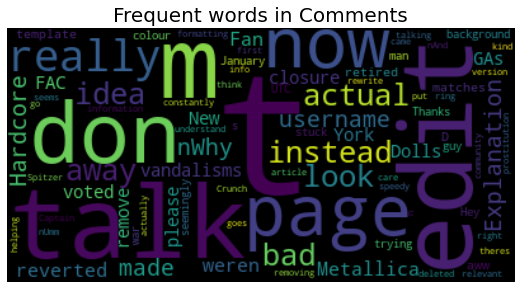

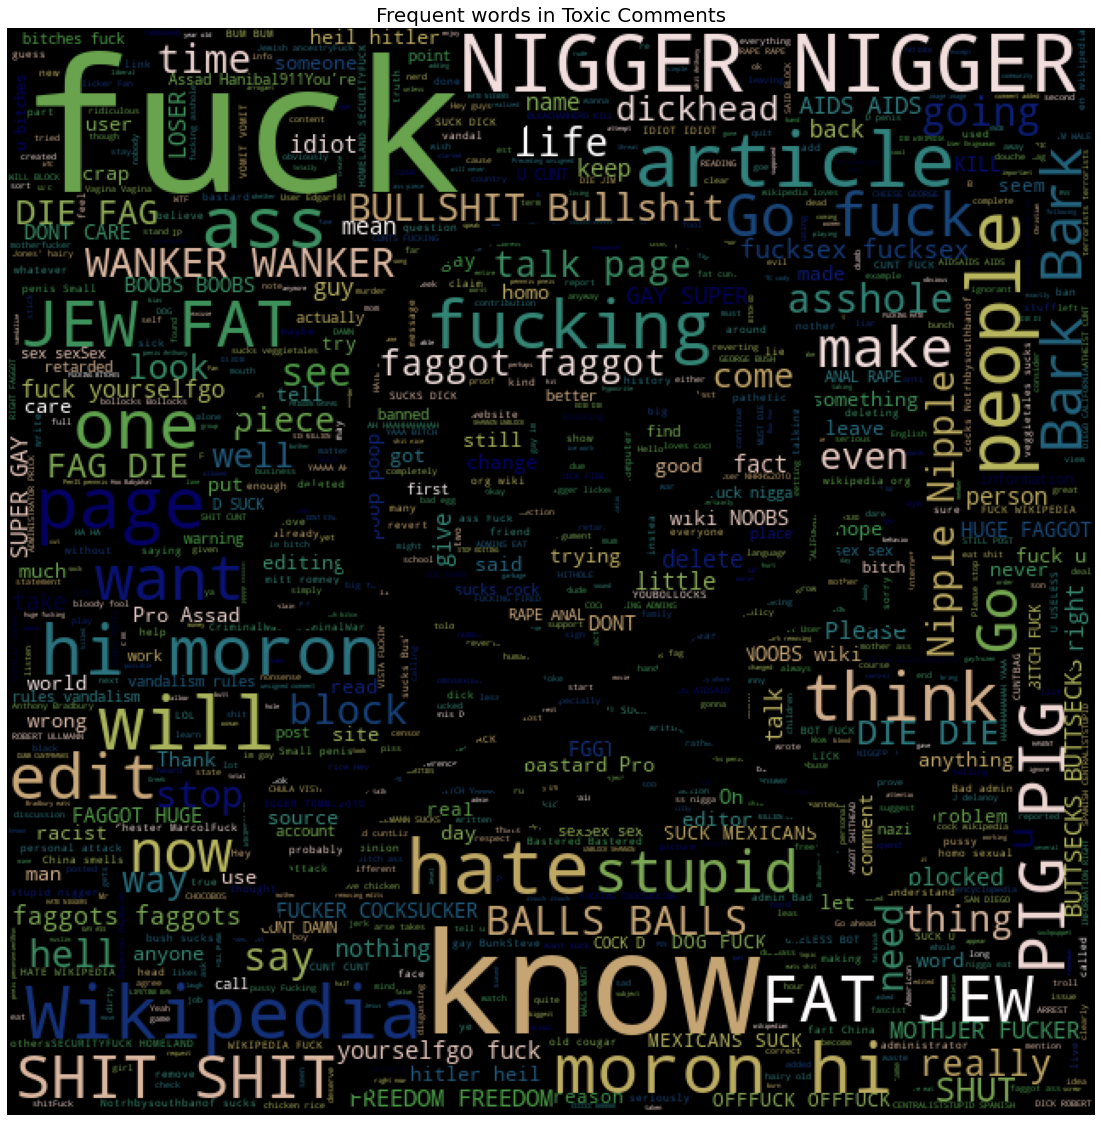

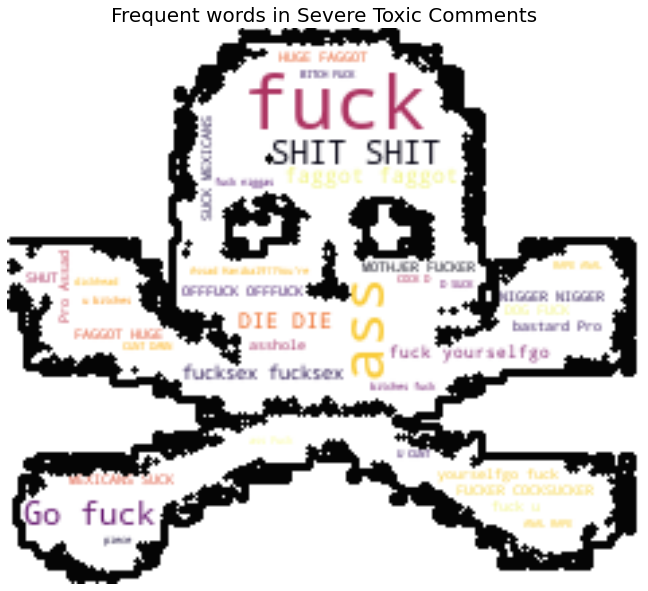

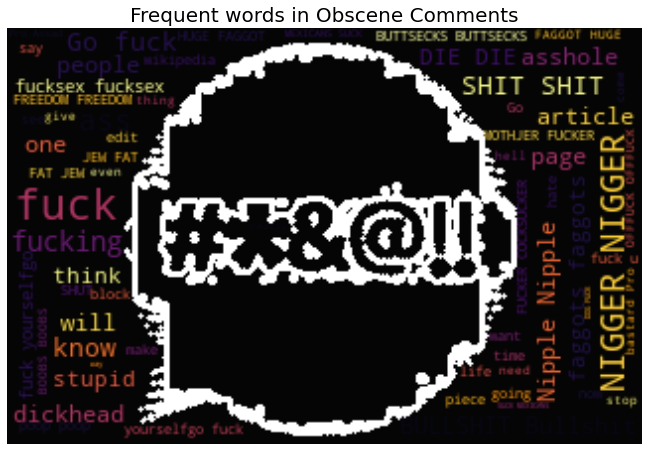

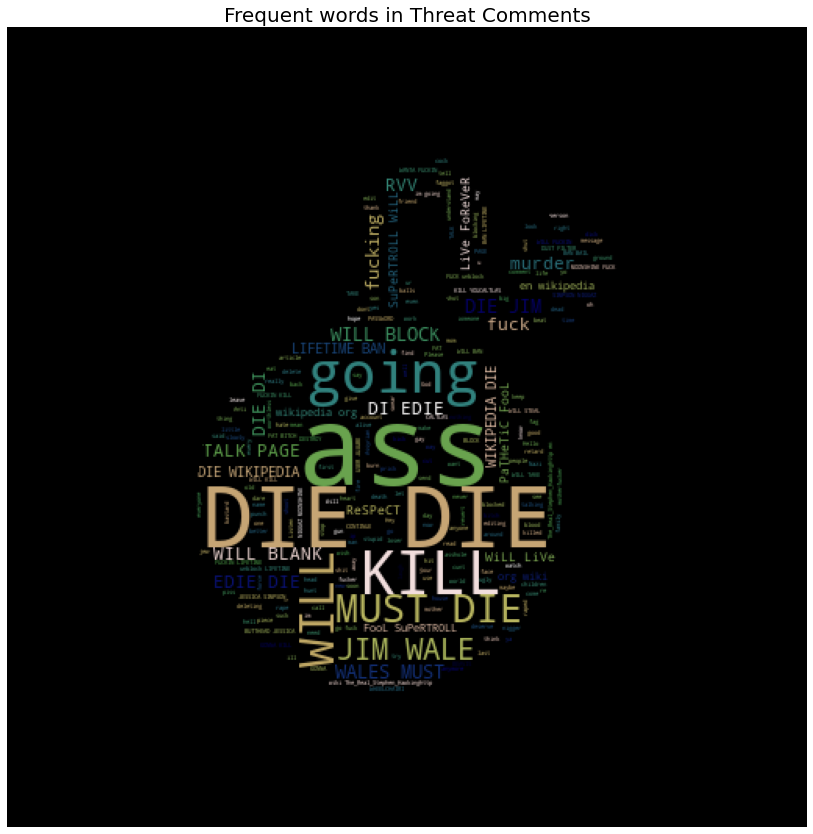

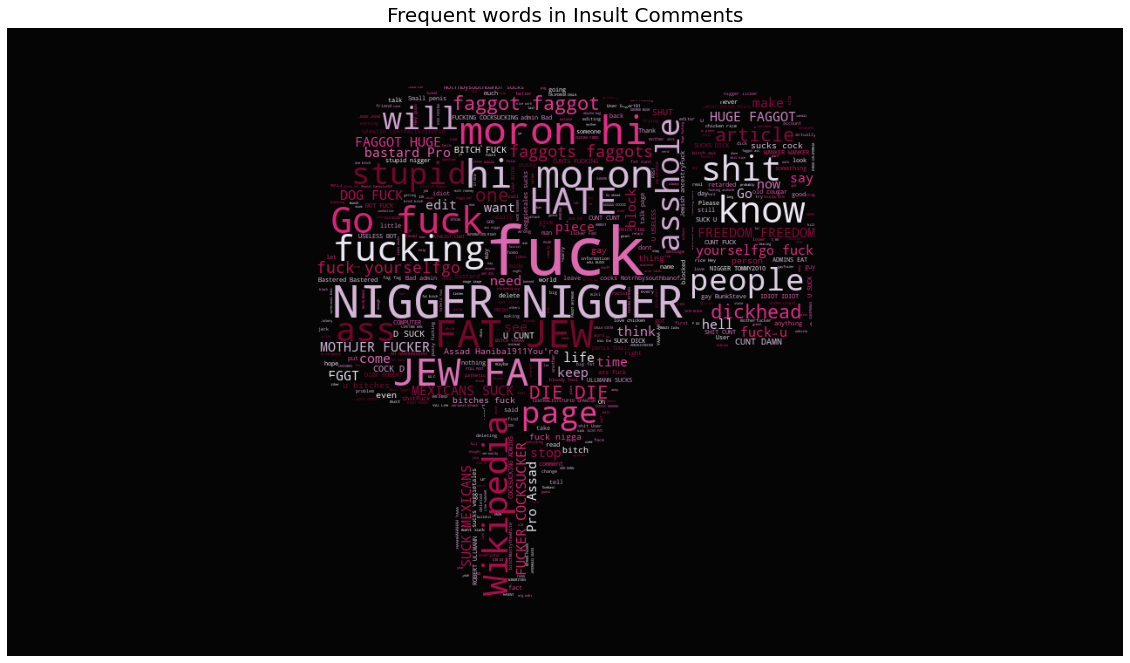

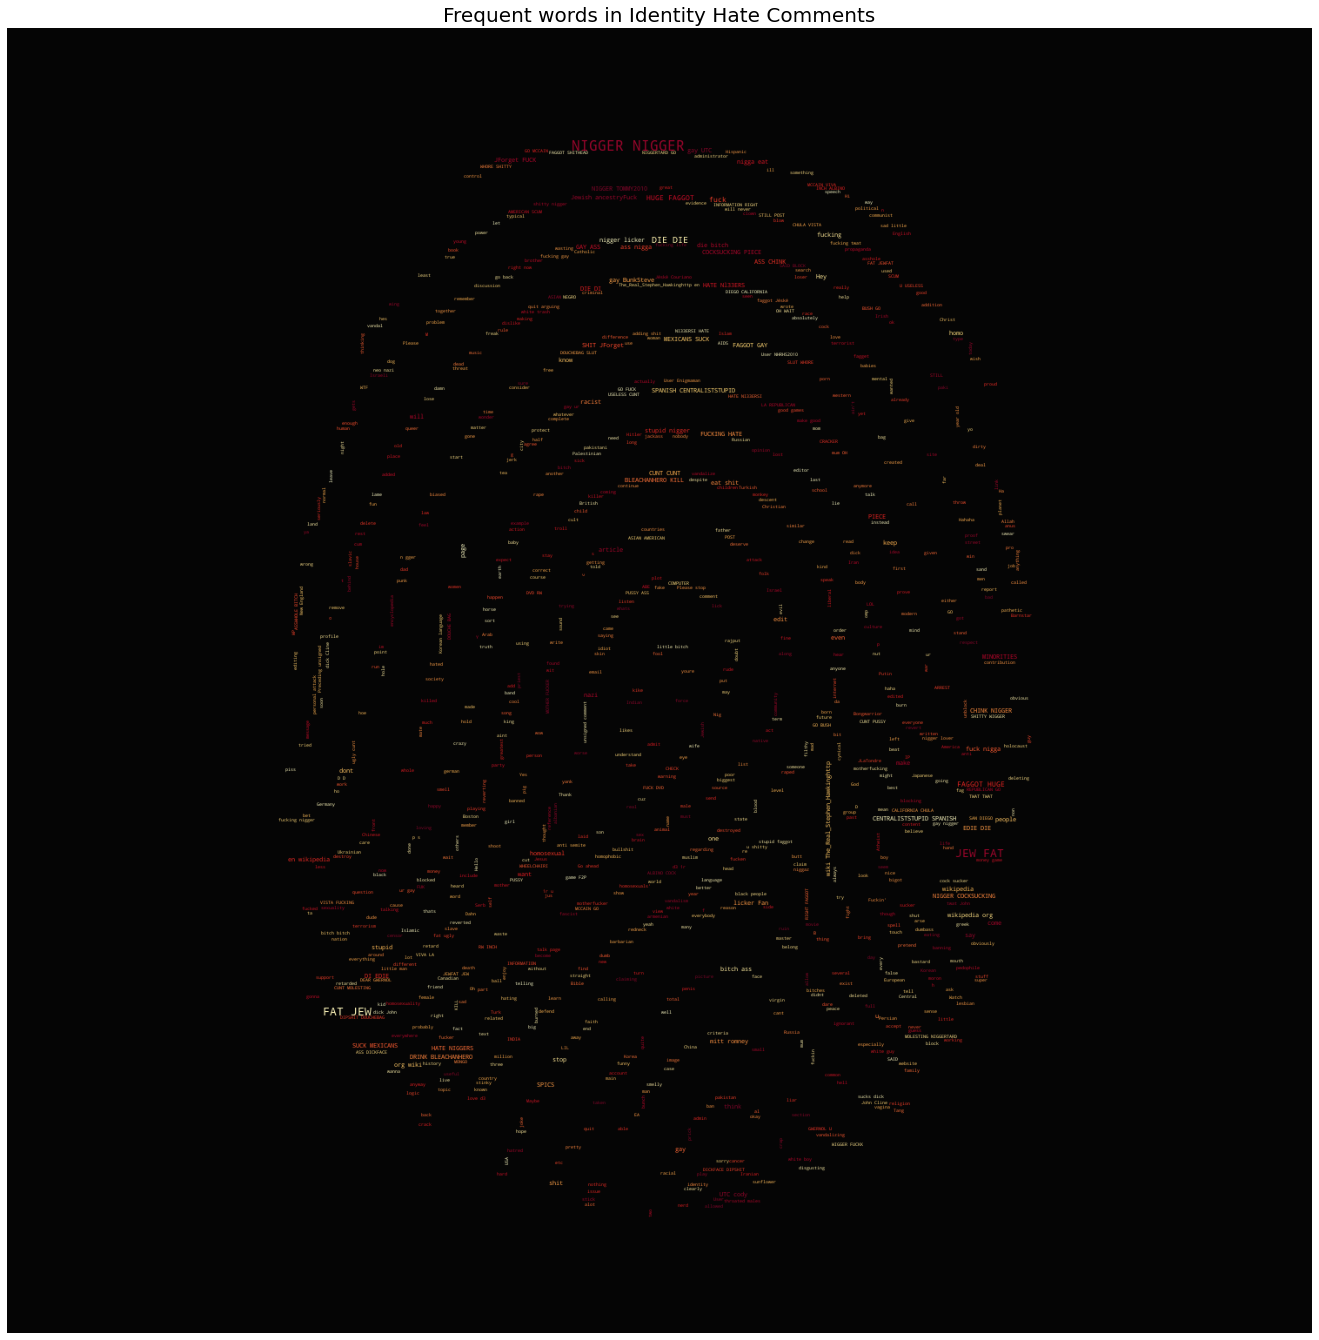

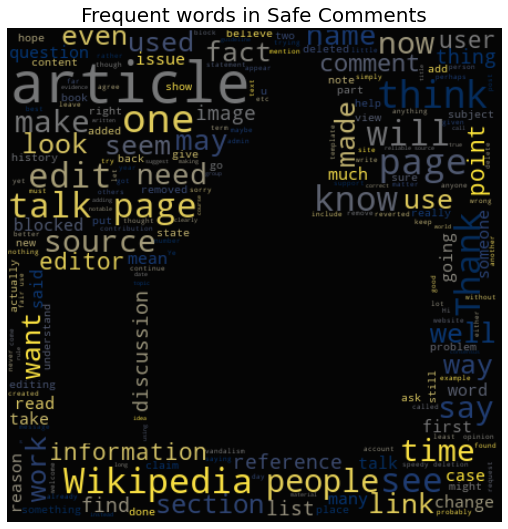

In [328]:
# word cloud from train dataset

# wordcloud for generic comments
text_only = re.sub('[^a-zA-Z]', ' ', str(train[train.iloc[0:]!=''].comment_text.values))
wordcloud = WordCloud(background_color='black', stopwords=stopword)
wordcloud.generate(text_only)
plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.axis('off')
plt.title('Frequent words in Comments', fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

# wordcloud for toxic comments
toxic_mask = np.array(Image.open('./images/toxic.jpg'))

text = train[train.toxic == 1].comment_text.values
wordcloud = WordCloud(width=2000, height=2000, max_words=2000, contour_width=20, contour_color='black',
                      background_color='black', mask=toxic_mask, stopwords=stopword)
wordcloud.generate(' '.join(text))
plt.figure(figsize=(20, 20))
plt.subplot(111)
plt.axis('off')
plt.title('Frequent words in Toxic Comments', fontsize=20)
plt.imshow(wordcloud.recolor(colormap='gist_earth', random_state=17), alpha=1)
plt.show()

# wordcloud for toxic comments
severe_mask = np.array(Image.open('./images/severe_toxic.jpg'))

text = train[train.severe_toxic == 1].comment_text.values
wordcloud = WordCloud(width=2000, height=2000, max_words = 2000, contour_width=2, contour_color='black',
                      background_color='white', mask=severe_mask, stopwords=stopword)
wordcloud.generate(' '.join(text))
plt.figure(figsize=(25, 25))
plt.subplot(221)
plt.axis('off')
plt.title('Frequent words in Severe Toxic Comments', fontsize=20)
plt.imshow(wordcloud.recolor(colormap='inferno', random_state=40), alpha=0.98, interpolation='bilinear')
plt.show()

# wordcloud for obscene comments
obscene_mask = np.array(Image.open('./images/obscene.jpg'))

text = train[train.obscene == 1].comment_text.values
wordcloud = WordCloud(width=2000, height=2000, max_words = 2000, contour_width=2, contour_color='white',
                      background_color='black', mask=obscene_mask, stopwords=stopword)
wordcloud.generate(' '.join(text))
plt.figure(figsize=(25, 25))
plt.subplot(221)
plt.axis('off')
plt.title('Frequent words in Obscene Comments', fontsize=20)
plt.imshow(wordcloud.recolor(colormap='inferno', random_state=40), alpha=0.98, interpolation='bilinear')
plt.show()

# wordcloud for threat comments
threat_mask = np.array(Image.open('./images/threat.jpg'))

text = train[train.threat == 1].comment_text.values
wordcloud = WordCloud(width=2000, height=2000, max_words=2000, contour_width=2,
                      background_color='black', mask=threat_mask, stopwords=stopword)
wordcloud.generate(' '.join(text))
plt.figure(figsize=(50, 50))
plt.subplot(333)
plt.axis('off')
plt.title('Frequent words in Threat Comments', fontsize=20)
plt.imshow(wordcloud.recolor(colormap='gist_earth', random_state=17), alpha=1)
plt.show()

# wordcloud for insult comments
insult_mask = np.array(Image.open('./images/insult.jpg'))

text = train[train.insult == 1].comment_text.values
wordcloud = WordCloud(width=2000, height=2000, max_words=2000, contour_width= 10,
                      background_color='black', mask=insult_mask, stopwords=stopword)
wordcloud.generate(' '.join(text))
plt.figure(figsize=(20, 20))
plt.subplot(111)
plt.axis('off')
plt.title('Frequent words in Insult Comments', fontsize=20)
plt.imshow(wordcloud.recolor(colormap='PuRd', random_state=50), alpha=0.98)
plt.show()

# wordcloud for identity_hate comments
identity_mask = np.array(Image.open('./images/identity_hate.jpg'))

text = train[train.identity_hate == 1].comment_text.values
wordcloud = WordCloud(width=2000, height=2000, max_words=2000, contour_width= 1,
                      background_color='black', mask=identity_mask, stopwords=stopword)
wordcloud.generate(' '.join(text))
plt.figure(figsize=(25, 24))
plt.subplot(111)
plt.axis('off')
plt.title('Frequent words in Identity Hate Comments', fontsize=20)
plt.imshow(wordcloud.recolor(colormap='YlOrRd', random_state=2), alpha=0.98)
plt.show()

# wordcloud for toxic comments
safe_mask = np.array(Image.open('./images/safe.jpg'))

text = train[train.clean == 1].comment_text.values
wordcloud = WordCloud(width=2000, height=2000, contour_width=3,
                      background_color='black', mask=safe_mask, stopwords=stopword)
wordcloud.generate(' '.join(text))
plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.axis('off')
plt.title('Frequent words in Safe Comments', fontsize=20)
plt.imshow(wordcloud.recolor(colormap='cividis', random_state=40), alpha=0.98, interpolation='bilinear')
plt.show()


In [329]:
# # word cloud from test dataset

# # wordcloud for generic comments
# text_only = re.sub('[^a-zA-Z]', ' ', str(test[test.iloc[0:]!=''].comment_text.values))
# wordcloud = WordCloud(background_color='black', stopwords=stopword)
# wordcloud.generate(text_only)
# plt.figure(figsize=(20, 20))
# plt.subplot(221)
# plt.axis('off')
# plt.title('Frequent words in Comments', fontsize=20)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.show()

# # wordcloud for toxic comments
# toxic_mask = np.array(Image.open('./images/toxic.jpg'))

# text = test[test.toxic == 1].comment_text.values
# wordcloud = WordCloud(width=2000, height=2000, max_words=2000, contour_width=20, contour_color='black',
#                       background_color='black', mask=toxic_mask, stopwords=stopword)
# wordcloud.generate(' '.join(text))
# plt.figure(figsize=(20, 20))
# plt.subplot(111)
# plt.axis('off')
# plt.title('Frequent words in Toxic Comments', fontsize=20)
# plt.imshow(wordcloud.recolor(colormap='gist_earth', random_state=17), alpha=1)
# plt.show()

# # wordcloud for toxic comments
# severe_mask = np.array(Image.open('./images/severe_toxic.jpg'))

# text = test[test.severe_toxic == 1].comment_text.values
# wordcloud = WordCloud(width=2000, height=2000, max_words = 2000, contour_width=2, contour_color='black',
#                       background_color='white', mask=severe_mask, stopwords=stopword)
# wordcloud.generate(' '.join(text))
# plt.figure(figsize=(25, 25))
# plt.subplot(221)
# plt.axis('off')
# plt.title('Frequent words in Severe Toxic Comments', fontsize=20)
# plt.imshow(wordcloud.recolor(colormap='inferno', random_state=40), alpha=0.98, interpolation='bilinear')
# plt.show()

# # wordcloud for obscene comments
# obscene_mask = np.array(Image.open('./images/obscene.jpg'))

# text = test[test.obscene == 1].comment_text.values
# wordcloud = WordCloud(width=2000, height=2000, max_words = 2000, contour_width=2, contour_color='white',
#                       background_color='black', mask=obscene_mask, stopwords=stopword)
# wordcloud.generate(' '.join(text))
# plt.figure(figsize=(25, 25))
# plt.subplot(221)
# plt.axis('off')
# plt.title('Frequent words in Obscene Comments', fontsize=20)
# plt.imshow(wordcloud.recolor(colormap='inferno', random_state=40), alpha=0.98, interpolation='bilinear')
# plt.show()

# # wordcloud for threat comments
# threat_mask = np.array(Image.open('./images/threat.jpg'))

# text = test[test.threat == 1].comment_text.values
# wordcloud = WordCloud(width=2000, height=2000, max_words=2000, contour_width=2,
#                       background_color='black', mask=threat_mask, stopwords=stopword)
# wordcloud.generate(' '.join(text))
# plt.figure(figsize=(50, 50))
# plt.subplot(333)
# plt.axis('off')
# plt.title('Frequent words in Threat Comments', fontsize=20)
# plt.imshow(wordcloud.recolor(colormap='gist_earth', random_state=17), alpha=1)
# plt.show()

# # wordcloud for insult comments
# insult_mask = np.array(Image.open('./images/insult.jpg'))

# text = test[test.insult == 1].comment_text.values
# wordcloud = WordCloud(width=2000, height=2000, max_words=2000, contour_width= 10,
#                       background_color='black', mask=insult_mask, stopwords=stopword)
# wordcloud.generate(' '.join(text))
# plt.figure(figsize=(20, 20))
# plt.subplot(111)
# plt.axis('off')
# plt.title('Frequent words in Insult Comments', fontsize=20)
# plt.imshow(wordcloud.recolor(colormap='PuRd', random_state=50), alpha=0.98)
# plt.show()

# # wordcloud for identity_hate comments
# identity_mask = np.array(Image.open('./images/identity_hate.jpg'))

# text = test[test.identity_hate == 1].comment_text.values
# wordcloud = WordCloud(width=2000, height=2000, max_words=2000, contour_width= 1,
#                       background_color='black', mask=identity_mask, stopwords=stopword)
# wordcloud.generate(' '.join(text))
# plt.figure(figsize=(25, 24))
# plt.subplot(111)
# plt.axis('off')
# plt.title('Frequent words in Identity Hate Comments', fontsize=20)
# plt.imshow(wordcloud.recolor(colormap='YlOrRd', random_state=2), alpha=0.98)
# plt.show()

# # wordcloud for toxic comments
# safe_mask = np.array(Image.open('./images/safe.jpg'))

# text = test[test.clean == 1].comment_text.values
# wordcloud = WordCloud(width=2000, height=2000, contour_width=3,
#                       background_color='black', mask=safe_mask, stopwords=stopword)
# wordcloud.generate(' '.join(text))
# plt.figure(figsize=(20, 20))
# plt.subplot(221)
# plt.axis('off')
# plt.title('Frequent words in Safe Comments', fontsize=20)
# plt.imshow(wordcloud.recolor(colormap='cividis', random_state=40), alpha=0.98, interpolation='bilinear')
# plt.show()
